# Preamble

In [1]:
dir_home = '/Users/kvantilburg/Dropbox/projects/LuminousBasin/LuminousBasin/luminous-basin/'
dir_events = dir_home+'mocks/event_lists/'
dir_source = dir_home+'data/likelihood_yellin_data/products_80610202001_orbit1_chu12_spatialARF/'
dir_production = dir_home+'data/production/'

In [2]:
%matplotlib inline
from my_units import *
from model_functions import * 
from load_functions import *
from yellin_functions import *

# Parameters

In [3]:
i_mock = '6' # mock file number
m = 3 # axion mass [keV]

In [4]:
# time intervals [seconds]
good_time_ints = np.asarray([
    [3.37603341e+08, 3.376033795e+08],
    [3.376036305e+08, 3.3760522972e+08]
])
exposure = np.sum([interval[1]-interval[0] for interval in good_time_ints])
livetime = np.asarray([1501.16599845754, 1481.86081041239])/exposure # effective fractional livetime of A and B
duration = np.max(good_time_ints)- np.min(good_time_ints)
print('livetime =',livetime)

livetime = [0.91661945 0.9048316 ]


In [5]:
# energy bins [units = keV]
sigma_E = 0.166 # energy resolution [keV]
n_sigma_E = 3
width_E = 0.04 # energy bin width is 40 keV
bins_E = np.arange(1.6,200.01,width_E)

In [6]:
# fiducial solar position 
ra_sun_fid = 170.66855149 * degree
dec_sun_fid = 4.02092024 * degree
# error on solar position 
sigma_sun = 2 * arcmin
# shift in solar position over duration starting from t_min
delta_ra_sun = 0.01962028 * degree
delta_dec_sun = -0.00835105 * degree
t_min = 3.37603341e+08
sigma_sun = 2*arcmin # error on solar position

In [7]:
ra_sun_0 = ra_sun_fid
dec_sun_0 = dec_sun_fid

In [8]:
list_file_events = [dir_events+file for file in listdir(dir_events) if file[0:len(i_mock)+1]==i_mock+'_']
file_box_centers = dir_source+'box_centers.txt'
list_file_arf = [dir_source+'arfs/'+file for file in listdir(dir_source+'arfs/')]

# Load data

In [9]:
df_box = load_box(file_box_centers)
rotation = df_box['rotation'].iloc[0] * degree
df_box

,detector,i1,i2,ra,dec,delta_x,delta_y,rotation
0,A,0,0,170.926,3.89641,1.000',1.000',330
1,A,1,0,170.940,3.90475,1.000',1.000',330
2,A,-1,0,170.911,3.88808,1.000',1.000',330
3,A,2,0,170.955,3.91308,1.000',1.000',330
4,A,-2,0,170.897,3.87975,1.000',1.000',330
...,...,...,...,...,...,...,...,...
333,B,6,5,170.984,4.01517,1.000',1.000',330
334,B,-6,-6,170.902,3.75640,1.000',1.000',330
335,B,6,-6,171.076,3.85640,1.000',1.000',330
336,B,-6,6,170.802,3.92960,1.000',1.000',330


In [10]:
df_arf = load_arf_m(list_file_arf,bins_E,df_box,m,sigma_E,n_sigma_E)
df_arf

339it [00:30, 11.29it/s]


,detector,idx_E,i1,i2,ra,dec,arf
0,A,0,-6,-6,170.889,3.75981,0.649652
1,A,0,-6,-5,170.881,3.77425,0.472580
2,A,0,-6,-4,170.872,3.78868,0.779855
3,A,0,-6,-3,170.864,3.80311,0.763282
4,A,0,-6,-2,170.856,3.81755,1.329886
...,...,...,...,...,...,...,...
3375,B,9,6,2,171.009,3.97187,2.292270
3376,B,9,6,3,171.001,3.98630,1.879769
3377,B,9,6,4,170.992,4.00073,1.357195
3378,B,9,6,5,170.984,4.01517,1.334073


In [11]:
df_events_m = load_events_m(list_file_events,m,sigma_E,n_sigma_E)
df_events_m

,detector,t,E,ra,dec
2,A,3.376033e+08,1.637593,170.908816,3.905575
3,A,3.376033e+08,1.626338,170.848979,3.924134
6,A,3.376033e+08,1.758961,170.967978,3.949408
7,A,3.376033e+08,1.888121,170.994804,3.969888
11,A,3.376033e+08,1.991862,170.933714,3.994473
...,...,...,...,...,...
20681,B,3.376052e+08,1.738299,170.940169,3.882129
20682,B,3.376052e+08,1.617851,170.881962,3.794562
20686,B,3.376052e+08,1.608423,170.940495,3.874040
20691,B,3.376052e+08,1.894036,170.859837,3.846790


In [12]:
t = df_events_m['t'].to_numpy()
E = df_events_m['E'].to_numpy()
ra = df_events_m['ra'].to_numpy()
dec = df_events_m['dec'].to_numpy()
x,y = map_x_y_from_ra_dec(ra,dec,rotation)

# Yellin projection 

## ARF interpolation

In [13]:
# arf interpolation function + boundaries
int_arf, x_min, x_max, y_min, y_max = load_int_arf(m,df_arf,rotation,bins_E,width_E)

ValueError: zero-size array to reduction operation minimum which has no identity

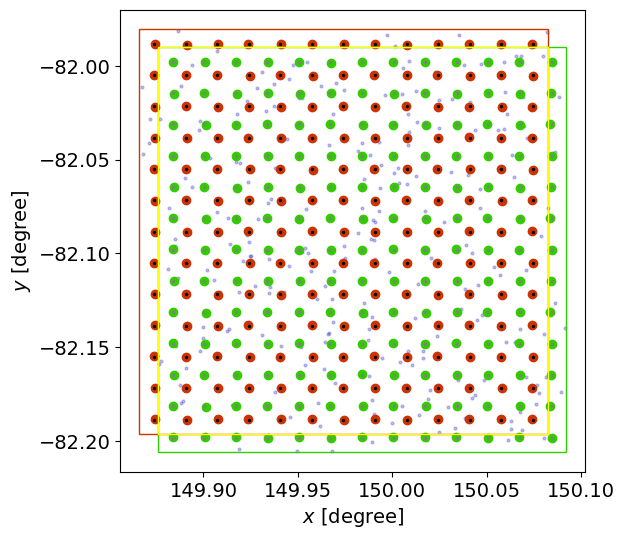

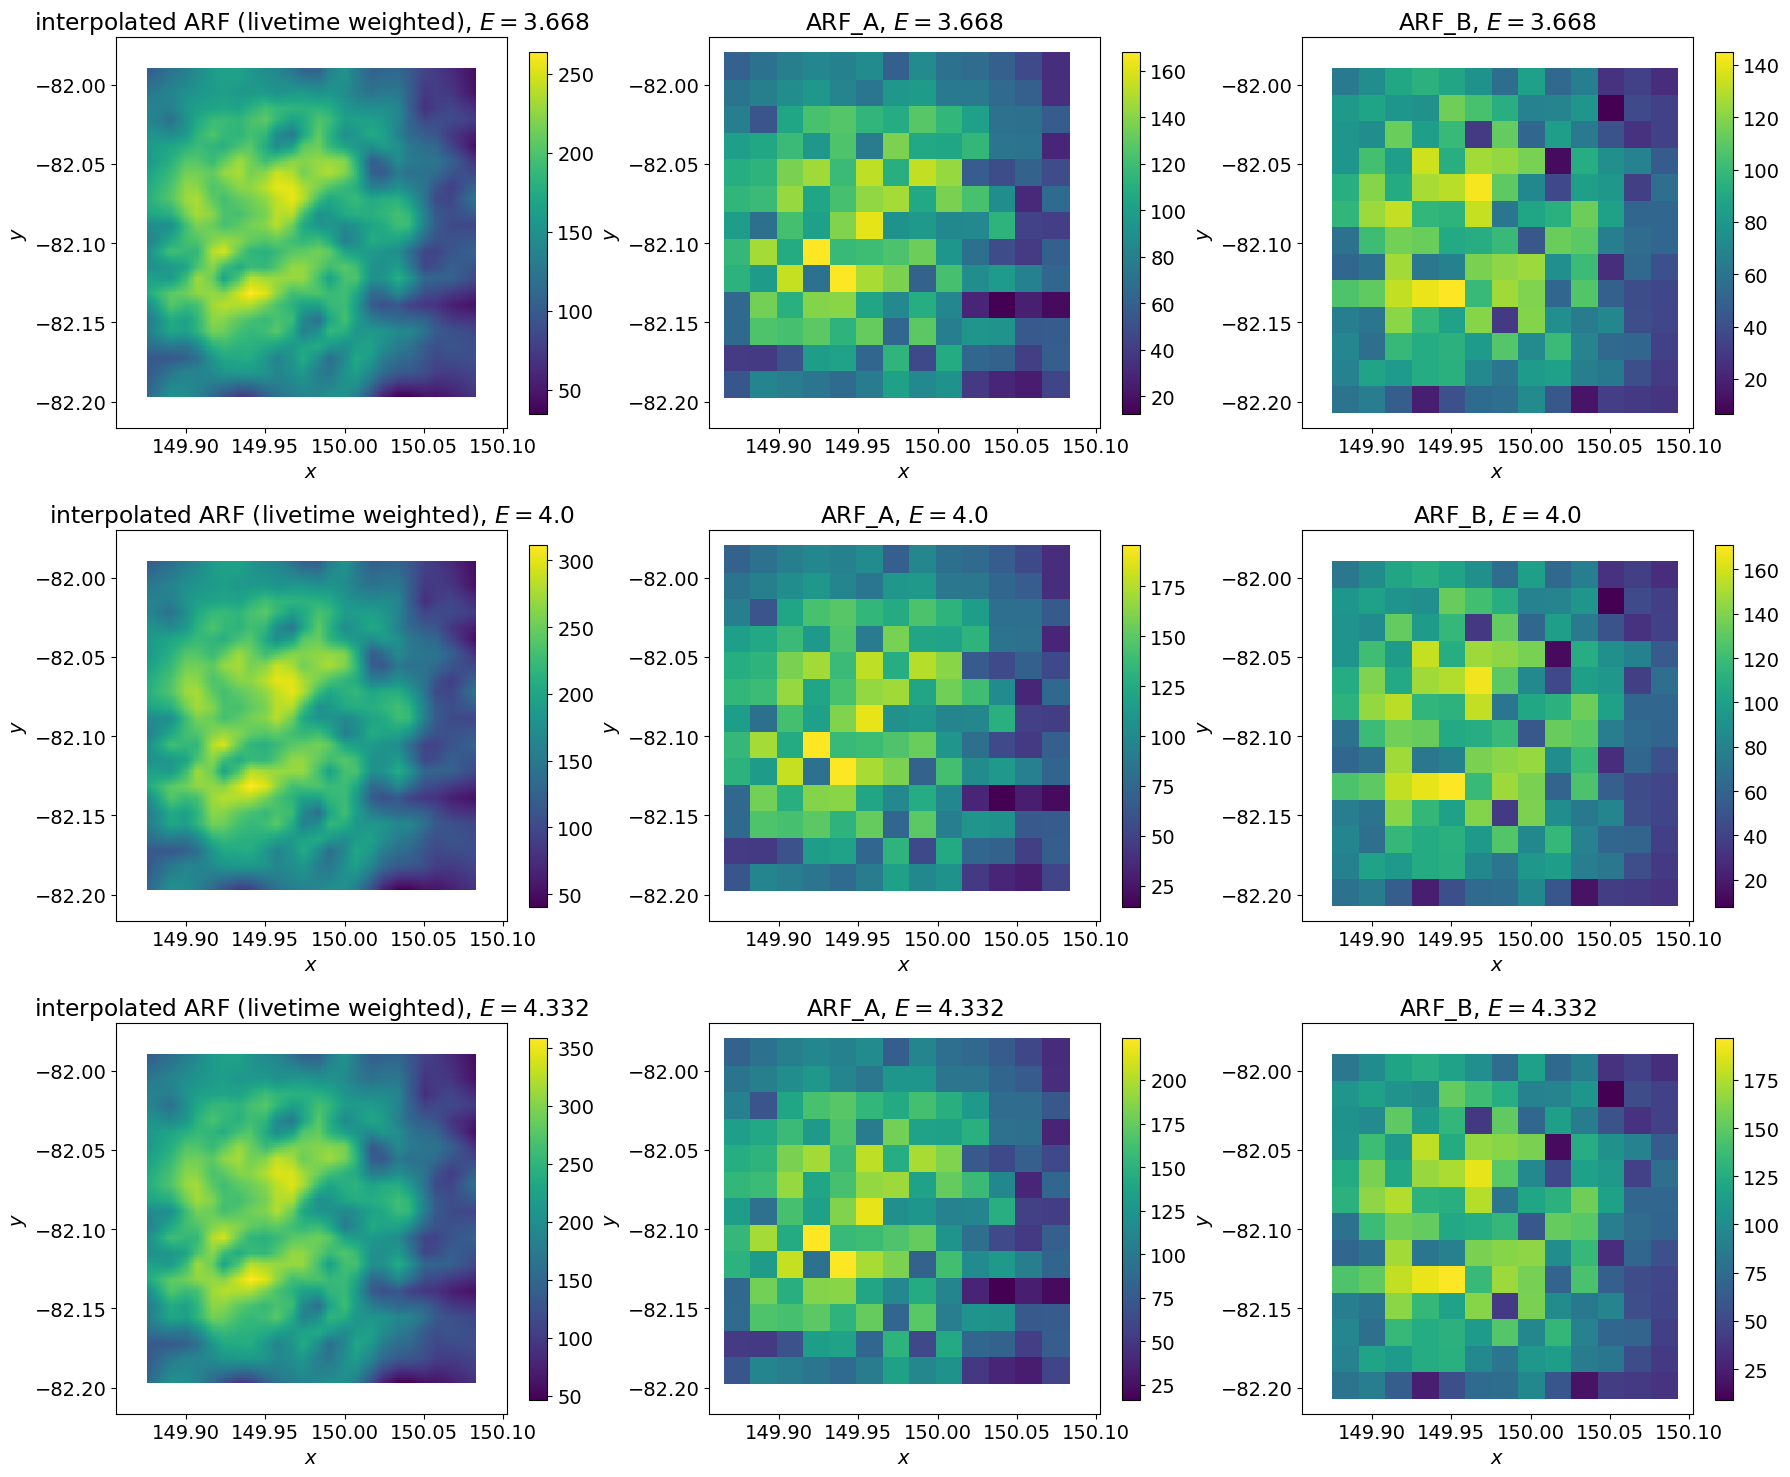

In [50]:
# plot xy field of view of ARF and events
fig1, fig2 = plot_xy_ARF(m,ra,dec,df_arf,livetime,rotation,bins_E,width_E,sigma_E); 

## Projection function

\begin{align}
S_0[m,g_{aee},g_{agg}] &= \frac{\dot\rho_\mathrm{b}[\mathrm{AU}]}{6\pi m} \frac{\mathrm{AU}^4}{R_\odot^3} \left(1 - e^{-\Gamma_\mathrm{rad} \tau_\mathrm{SS}} \right)  \\
\rho_4[t,E,x,y] &\equiv \frac{\mathrm{d} N}{\mathrm{d}t \, \mathrm{d}E \, \mathrm{d} x \, \mathrm{d} y} = (\mathrm{ARF})  (\mathrm{livetime}) \frac{\exp\left\lbrace{-\frac{(E-m/2)^2}{2\sigma_E^2}}\right\rbrace}{\sqrt{2 \pi \sigma_E^2}} S_0[m,g_{aee},g_{agg}] T(\theta)\\
\rho_3[E,x,y] &= \int_{t_\mathrm{min}}^{t_\mathrm{max}} \mathrm{d}t \, \rho_4[t,E,x,y] \\
\rho_2[x,y] &= \int_{E_\mathrm{min}}^{E_\mathrm{max}} \mathrm{d}E \, \rho_3[E,x,y] \\
\rho_1[y] &= \int_{x_\mathrm{min}}^{x_\mathrm{max}} \mathrm{d}x\, \rho_2[x,y]\\
\mu \equiv \rho_0 &= \int_{y_\mathrm{min}}^{y_\mathrm{max}} \mathrm{d}y\, \rho_1[y]
\end{align}

$$ r_1[t,E,x,y] = \frac{\int_{y_\mathrm{min}}^y \mathrm{d} y' \rho_1[y']}{\mu}; \quad 
r_2[t,E,x,y] = \frac{\int_{x_\mathrm{min}}^x \mathrm{d} x' \rho_2[x',y]}{\rho_1[y]}; \quad
r_3[t,E,x,y] = \frac{\int_{E_\mathrm{min}}^E \mathrm{d} E' \rho_3[E',x,y]}{\rho_2[x,y]}; \quad
r_4[t,E,x,y] = \frac{\int_{t_\mathrm{min}}^t \mathrm{d} t' \rho_4[t,E,x,y]}{\rho_3[E,x,y]}$$

$\lbrace t,E,x,y\rbrace \rightarrow \lbrace r_1,r_2,r_3,r_4 \rbrace$ maps each photon onto 4D unit cube, such that for pure signal one expects uniform distribution.

In [51]:
r_1, r_2, r_3, r_4, rho_0 = proj_unit_cuboid(t,E,x,y,m,ra_sun_0,dec_sun_0,delta_ra_sun,delta_dec_sun,t_min,duration,
                     good_time_ints,livetime,bins_E,sigma_E,n_sigma_E,x_min,x_max,y_min,y_max,rotation,df_arf,int_arf,N_x=26,N_y=26)

Computing rho_3 table...
time for rho_3 table = 107.80819082260132
Computing rho_2 table...
time for rho_2 table = 407.44367384910583
Computing rho_1 table...
Computing rho_0...
rho functions computed.
Computing r_4 coordinates...
time for r_4 array = 1.3736581802368164
Computing r_3 coordinates...
time for r_3 array = 14.726262092590332
Computing r_2 coordinates...
time for r_2 array = 11.698349714279175
Computing r_1 coordinates...
time for r_1 array = 2.954681158065796


In [56]:
rho_0

29870.708173418447

In [106]:
df_rho0 = pd.DataFrame(data=[[m,ra_sun_0,dec_sun_0,rho_0]],columns=['m','ra_sun_0','dec_sun_0','rho_0'])
df_rho0

,m,ra_sun_0,dec_sun_0,rho_0
0,3,2.978728,0.070178,29870.708173


In [104]:
df_proj = pd.DataFrame(data=np.transpose([r_1,r_2,r_3,r_4]),columns=['r_1','r_2','r_3','r_4'])
df_proj

,r_1,r_2,r_3,r_4
0,0.195672,0.624359,0.044347,0.009720
1,0.942541,0.195261,0.012926,0.028765
2,0.308969,0.927250,0.162112,0.034558
3,0.566210,0.020652,0.001188,0.043197
4,0.032787,0.971128,0.001815,0.060053
...,...,...,...,...
219,0.064898,0.913295,0.999747,0.956302
220,0.872149,0.215301,0.075798,0.972812
221,0.726679,0.054933,0.289296,0.982623
222,0.980694,0.024119,0.006673,0.956847


## Total signal

In [81]:
sigma_E

0.166

In [42]:
tau_SS = 4.6e9 * Year

In [43]:
def Gamma_rad(m,gagg,gaee):
    """Decay rate in units of second^-1. Units: Gamma_rad, m [keV], gagg [GeV^-1]."""
    return (gagg)**2 * m**3 / (64 * np.pi) + AlphaEM**2 * gaee**2 / (9216 * np.pi**3) * m**7 / MElectron**6

In [44]:
tab_e = np.asarray(pd.read_csv(dir_production+'tabe.csv'))
tab_gamma = np.asarray(pd.read_csv(dir_production+'tabgamma.csv'))

In [45]:
int_rho_dot_over_m_e = interp1d(np.log10(tab_e[:,0]),np.log10(tab_e[:,1]/tab_e[:,0] * (GeV/keV) * (RSolar/AU)**4),
                                bounds_error=False,fill_value=(1e-100,1e-100))
int_rho_dot_over_m_gamma = interp1d(np.log10(tab_gamma[:,0]),np.log10(tab_gamma[:,1]/tab_gamma[:,0] * (GeV/keV) * (RSolar/AU)**4),
                                bounds_error=False,fill_value=(1e-100,1e-100))

In [46]:
def fn_rho_dot_over_m(m, gaee, gagg):
    """Returns number density injection rate at R = 1 AU.
    Units: m [keV], gagg [GeV^-1]"""
    return (CentiMeter**-3 * Year**-1) * (gaee**2 * 10**int_rho_dot_over_m_e(np.log10(m/keV)) + (gagg * GeV)**2 * 10**int_rho_dot_over_m_gamma(np.log10(m/keV)))

In [47]:
def S0_signal(m,gagg,gaee):
    """Signal count rate per unit area and per solid angle on the celestial sphere, in the center of the Sun (theta = 0). 
    Units: m [keV], gagg [GeV^-1]"""
    factor_prod = fn_rho_dot_over_m(m,gaee,gagg) / (6*np.pi) * AU**4 * RSolar**-3
    factor_decay = (1 - np.exp(-Gamma_rad(m,gagg,gaee) * tau_SS))
    return factor_prod * factor_decay

In [48]:
S0_signal(m=12*keV,gagg=1e-10*GeV**-1,gaee=1e-13) / Second**-1 / CentiMeter**-2 / degree**-2 

0.33770575434181016

In [49]:
def N_signal(m,gagg,gaee):
    """Total expected signal counts"""
    return S0_signal(m,gaee,gagg) * rho_0_val * Second *  CentiMeter**2 * degree**2

In [50]:
N_signal(m=12*keV,gagg=1e-12*GeV**-1,gaee=1e-13)

9851.423648575634

# Calculate volumes

In [ ]:
k1 = 10
k2 = 10
k3 = 10
k4 = N_bins_t

# Scratch

In [109]:
len(np.arange(3,40,0.1))

370